# Warming Strip Visualisations

<br>

In this notebook we set out to <a href="https://www.climate-lab-book.ac.uk/2018/warming-stripes/">recreate the warming stripes</a> that were created by Professor Ed Hawkins from the University of Reading: 

<img src="https://www.climate-lab-book.ac.uk/files/2018/05/globalcore.png" width="500"></img>

<br>

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

<br>

### Helper Functions

In [27]:
def hide_spines(ax, positions=['top', 'right']):
    """
    Pass a matplotlib axis and list of positions with spines to be removed
    
    args:
        ax:          Matplotlib axis object
        positions:   Python list e.g. ['top', 'bottom']
    """
    assert isinstance(positions, list), 'Position must be passed as a list '
    
    for position in positions:
        ax.spines[position].set_visible(False)
        
def drop_ticks(ax):
    ax.set_xticks([])
    ax.set_yticks([])

<br>

### Reading in Data

The temperature data is the average temperature from observations averaged across a single year

In [2]:
df_temps = pd.read_csv('data/temperatures/combined_observed.csv', parse_dates=['datetime']).set_index('datetime')
df_temps['average'] = df_temps.mean(axis=1)

df_temps.head()

,NASA,NOAA,MET,CandW,BE,average
datetime,,,,,,
1851-06-30,NaN,NaN,13.883853,NaN,13.681571,13.782712
1852-06-29,NaN,NaN,14.038436,NaN,13.763417,13.900926
1853-06-30,NaN,NaN,14.028353,NaN,13.774833,13.901593
1854-06-30,NaN,NaN,13.986853,NaN,13.749583,13.868218
1855-06-30,NaN,NaN,14.006686,NaN,13.803917,13.905301


<br>

### Processing Data

In [47]:
avg_20th_century_temp = df_temps.loc['1900':'1999', 'average'].mean()
s_avg_yrly_dev = df_temps['average']-avg_20th_century_temp
years = s_avg_yrly_dev.index.year

s_avg_yrly_dev.head()

datetime
1851-06-30   -0.355622
1852-06-29   -0.237408
1853-06-30   -0.236741
1854-06-30   -0.270116
1855-06-30   -0.233033
Name: average, dtype: float64

<br>

### Visualising Warming Stripes

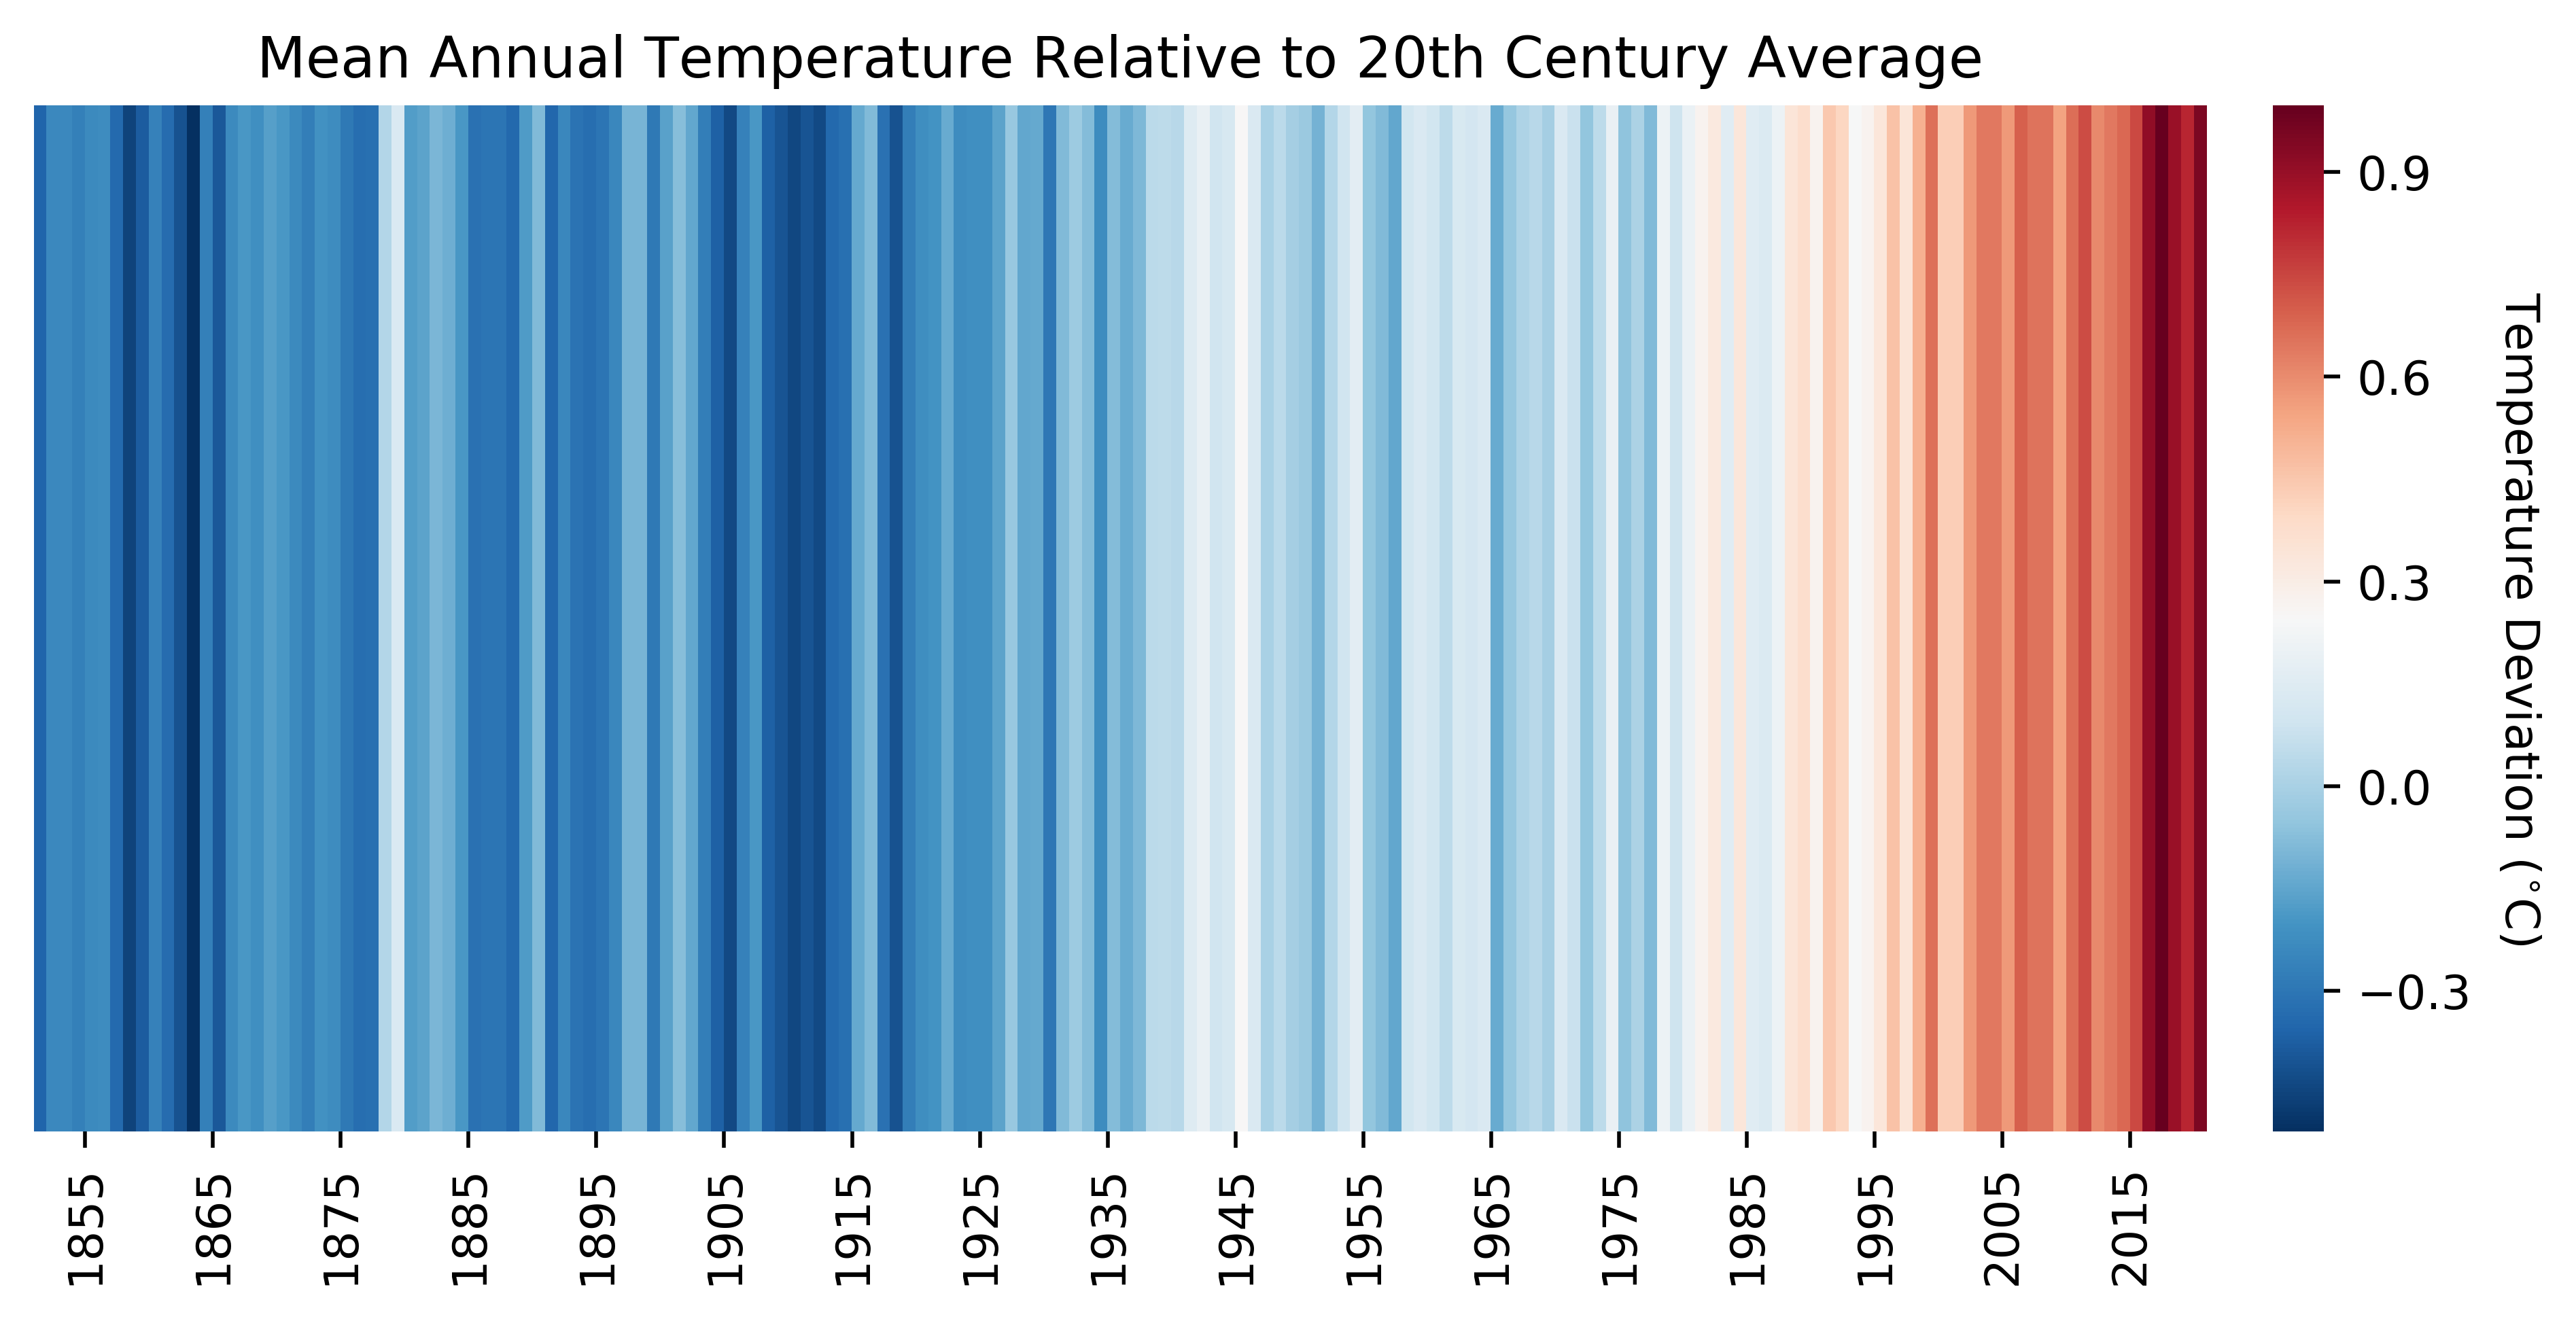

In [80]:
fig, ax = plt.subplots(dpi=500, figsize=(10, 4))

sns.heatmap(s_avg_yrly_dev.values.reshape(1, -1), cmap='RdBu_r', vmin=s_avg_yrly_dev.min(), vmax=s_avg_yrly_dev.max(), ax=ax, cbar_kws={'pad':0.025})

hide_spines(ax)
ax.set_yticks([])

ytick_years = years[4::10]
ytick_locs = ytick_years - years[0]
ax.set_xticks(ytick_locs.values)
ax.set_xticklabels(ytick_years.values)

ax.set_title('Mean Annual Temperature Relative to 20th Century Average')

cbar_ax = fig.axes[-1]
cbar_ax.set_ylabel('Temperature Deviation ($^{\circ}$C)', rotation=270, labelpad=15)

fig.savefig('img/warming_stripes.png')